In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('final_data_frame.csv')

In [3]:
df

,DATE,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price,CSUSHPISA
0,2003-01-01,341.0,1537,999,2.25,0.600416,4.0,2743734.0,1389.559524,1808.0,1416.0,114.1698,68.1,863855.0,5.8,160883.13,271850.87,128.461
1,2003-02-01,341.0,1301,936,2.25,0.111692,4.5,2743734.0,1313.261579,1854.0,1357.0,114.1698,68.1,859225.0,5.9,161921.15,271512.85,129.355
2,2003-03-01,338.0,1399,999,2.25,-0.053388,4.1,2743734.0,1348.503810,1757.0,1359.0,114.1698,68.1,851132.0,5.9,163045.67,271765.80,130.148
3,2003-04-01,340.0,1374,1012,2.25,0.309542,4.1,2831413.0,1409.830952,1803.0,1391.0,116.2112,68.2,859459.0,6.0,164583.47,274926.03,130.884
4,2003-05-01,343.0,1391,1078,2.25,0.017751,3.9,2831413.0,1524.182857,1835.0,1389.0,116.2112,68.2,866814.0,6.1,166198.17,278077.16,131.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2023-04-01,430.0,847,679,0.25,-0.025790,7.6,6802375.0,12073.464211,1417.0,856.0,157.8759,65.9,1907837.0,3.4,391534.51,396262.15,300.198
244,2023-05-01,426.0,1012,710,0.25,0.077990,7.2,6802375.0,12446.530455,1496.0,902.0,157.8759,65.9,1946733.0,3.7,396887.99,400671.21,302.620
245,2023-06-01,429.0,930,683,0.25,0.079728,7.5,6802375.0,13463.777619,1441.0,924.0,157.8759,65.9,1956226.0,3.6,399117.81,401625.47,304.651
246,2023-07-01,431.0,988,736,0.25,0.091045,7.0,6920709.0,14033.091000,1443.0,930.0,157.8759,66.0,1969005.0,3.5,401559.07,403312.74,306.634


## Univariate Analysis

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [6]:
# Standardization
x_scaled= scaler.fit_transform(df.iloc[:,1:])

In [7]:
std=pd.DataFrame(x_scaled)

In [8]:
std.insert(0,'DATE', df['DATE'])

In [9]:
std.columns=df.columns

In [10]:
std.head()

,DATE,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price,CSUSHPISA
0,2003-01-01,0.160353,1.591086,1.150013,0.272327,1.546883,-1.129214,-1.595429,-0.987276,1.047077,1.382283,-0.535463,1.054732,-1.017329,-0.065120,-1.104838,-0.576207,-1.224200
1,2003-02-01,0.160353,0.985498,0.932052,0.272327,0.149427,-0.871203,-1.595429,-1.007128,1.144565,1.227102,-0.535463,1.054732,-1.032393,-0.016181,-1.087706,-0.583720,-1.204696
2,2003-03-01,0.135157,1.236971,1.150013,0.272327,-0.322602,-1.077611,-1.595429,-0.997958,0.938993,1.232362,-0.535463,1.054732,-1.058723,-0.016181,-1.069146,-0.578098,-1.187396
3,2003-04-01,0.151954,1.172820,1.194989,0.272327,0.715159,-1.077611,-1.510621,-0.982002,1.036481,1.316528,-0.433029,1.110057,-1.031631,0.032757,-1.043765,-0.507854,-1.171339
4,2003-05-01,0.177150,1.216443,1.423329,0.272327,-0.119189,-1.180816,-1.510621,-0.952249,1.104298,1.311268,-0.433029,1.110057,-1.007702,0.081696,-1.017114,-0.437813,-1.152773


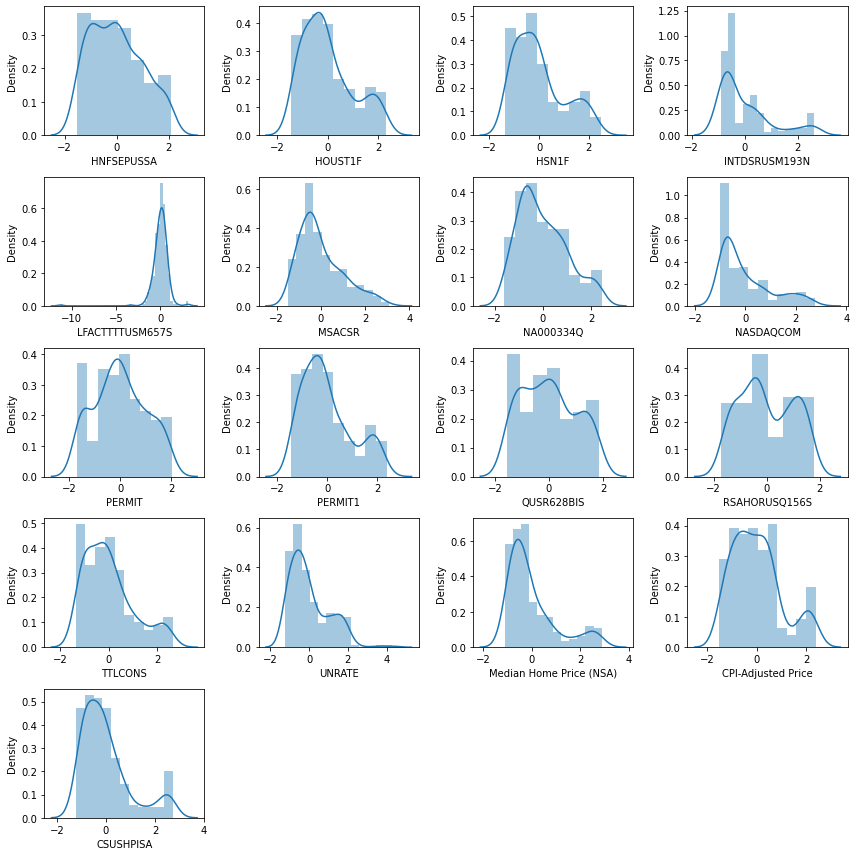

In [11]:
# visualizing distribution of each feature

fig, axes = plt.subplots(5, 4, figsize=(12, 12))

axes = axes.flatten()

for i in range(1, 18):
    sns.distplot(std.iloc[:, i], kde=True, ax=axes[i - 1])
    

for i in range(17, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

**Result** : Most of the features are almost normally distributed

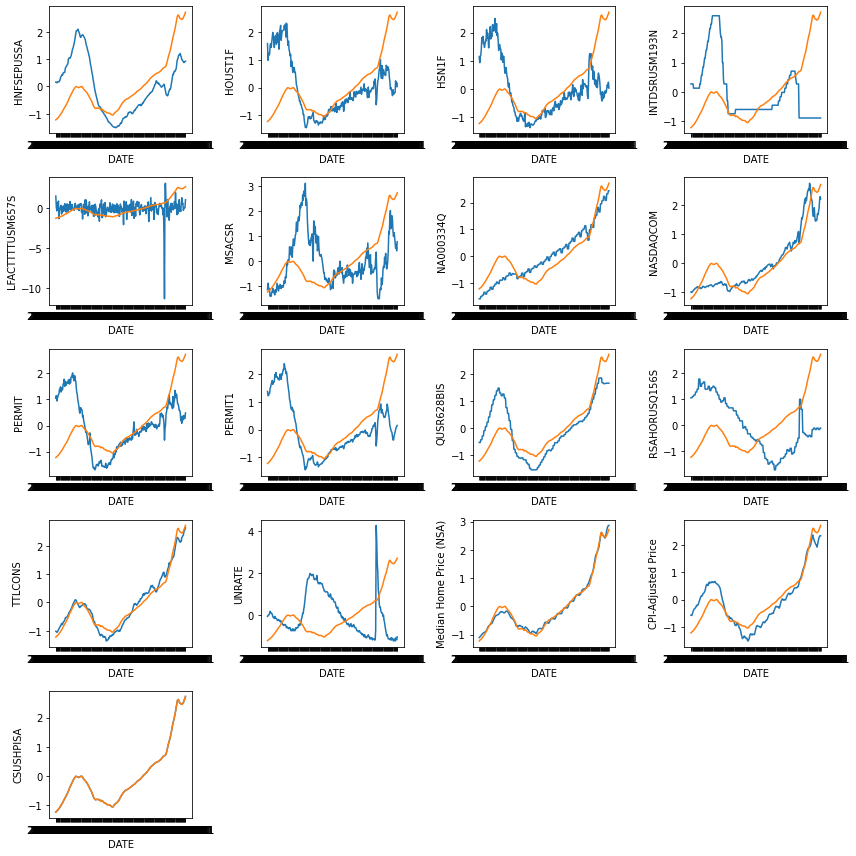

In [12]:
# visualizing trend of each feature with target feature

fig, axes = plt.subplots(5, 4, figsize=(12, 12))

axes = axes.flatten()

for i in range(1, 18):
    sns.lineplot(x=std.iloc[:, 0],y=std.iloc[:,i], ax=axes[i - 1])
    sns.lineplot(x=std.iloc[:, 0],y=std.iloc[:,-1], ax=axes[i - 1])
    

for i in range(17, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

## Correlation Matrix

<AxesSubplot:>

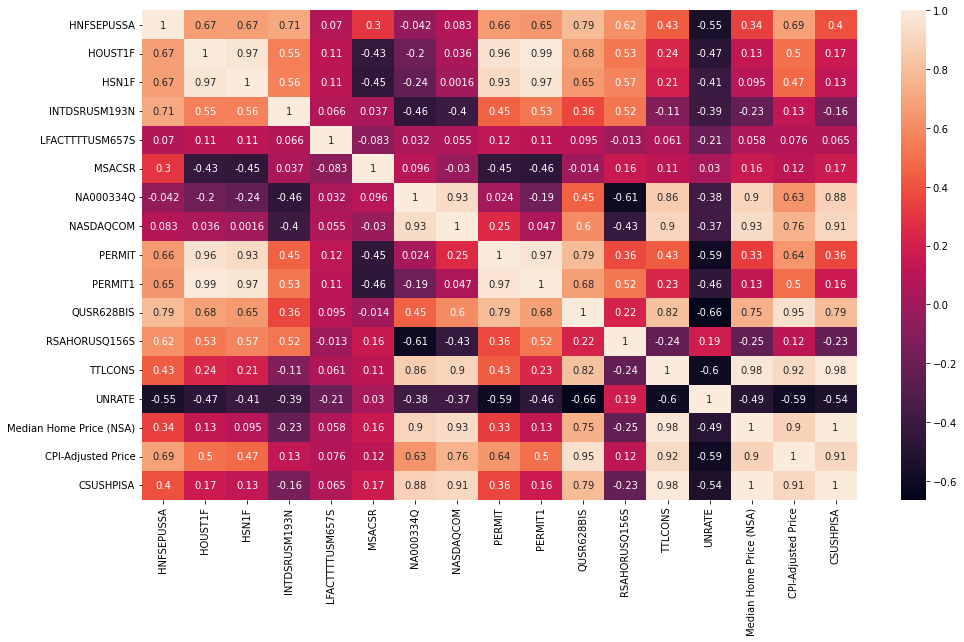

In [13]:
# checking correlation and multicollinearity between features
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

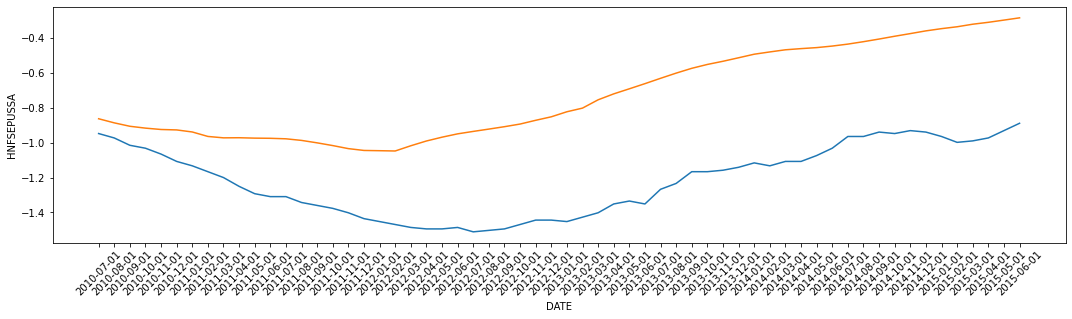

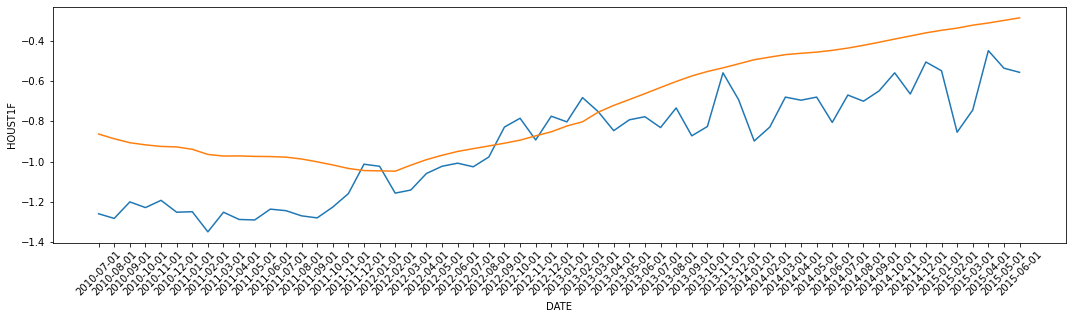

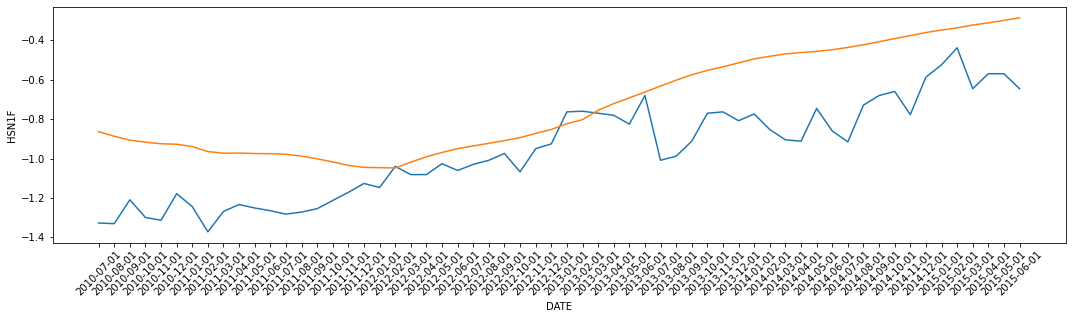

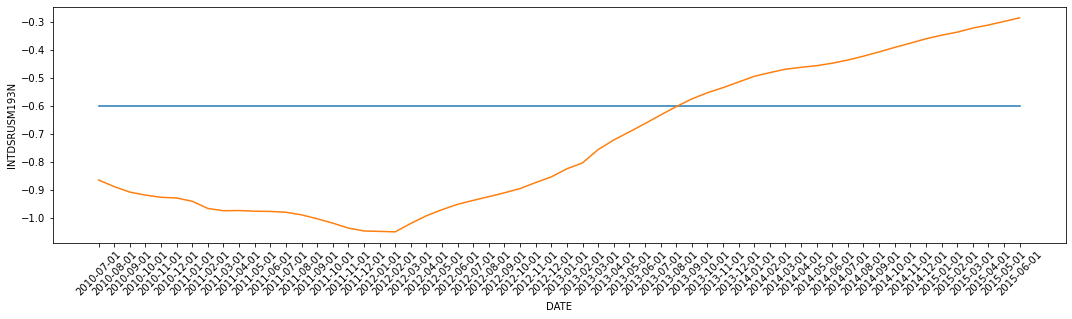

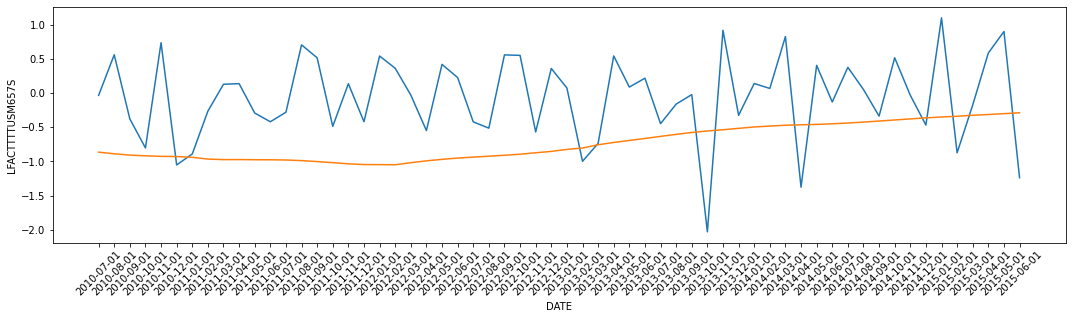

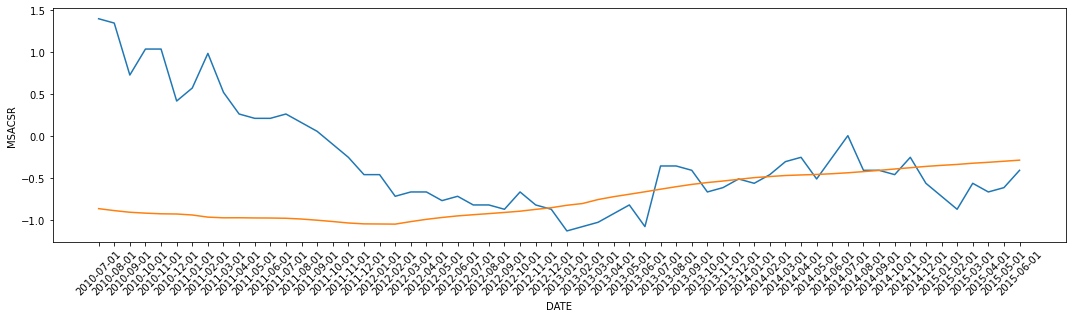

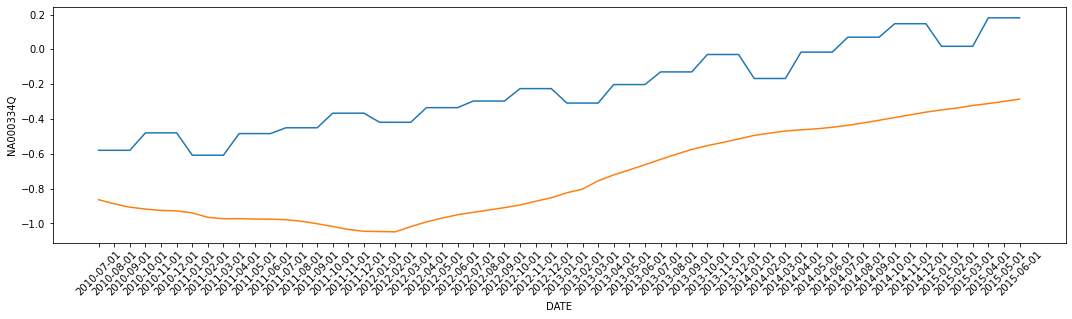

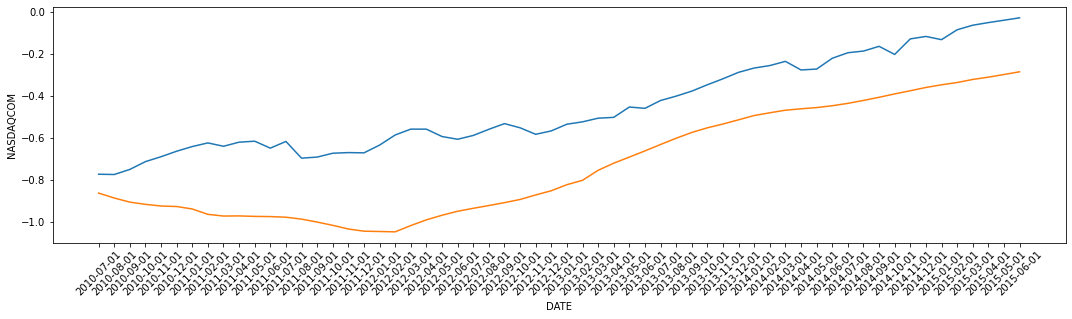

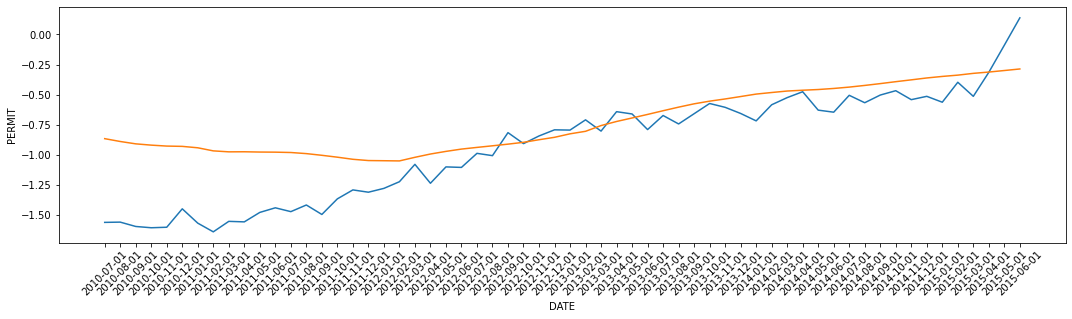

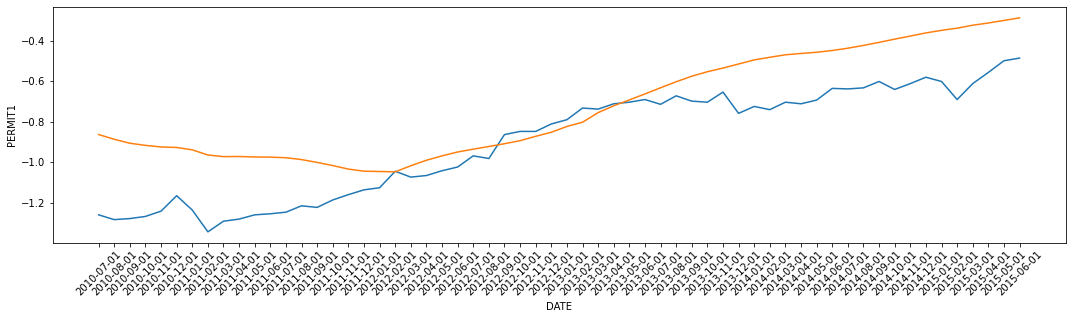

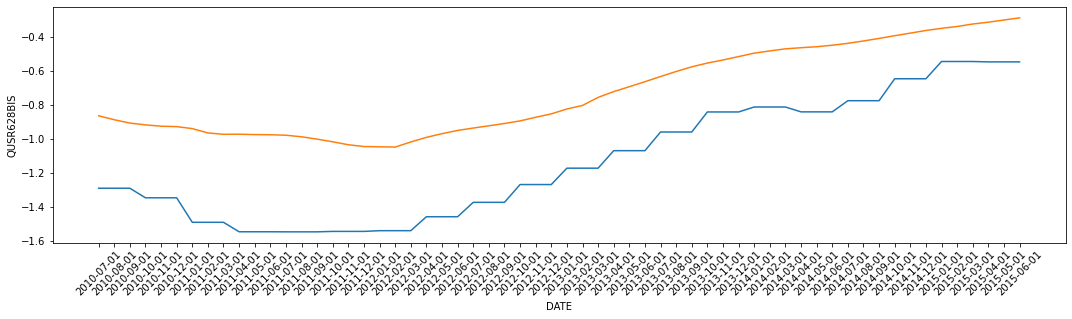

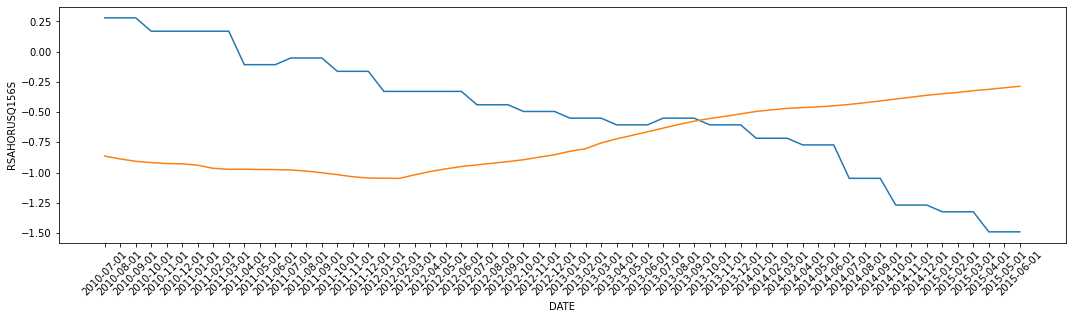

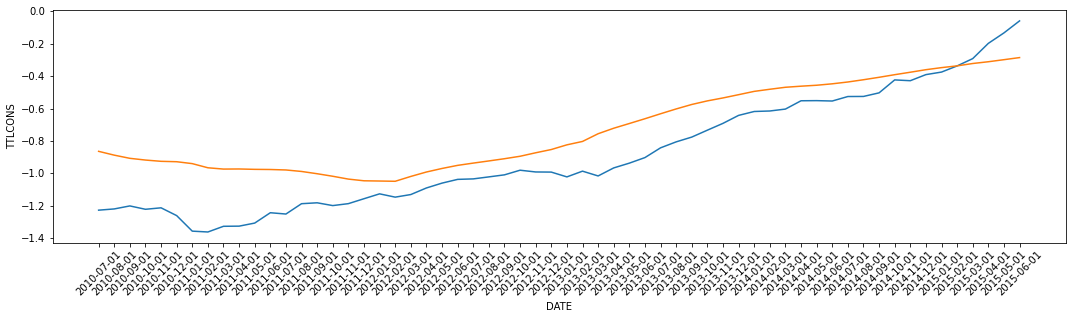

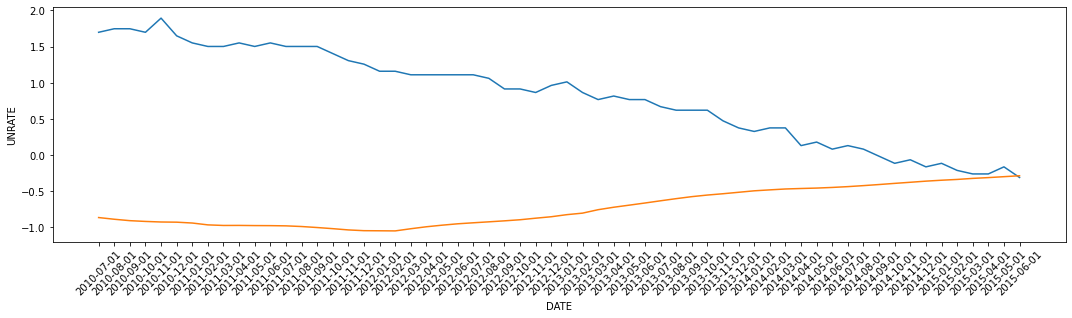

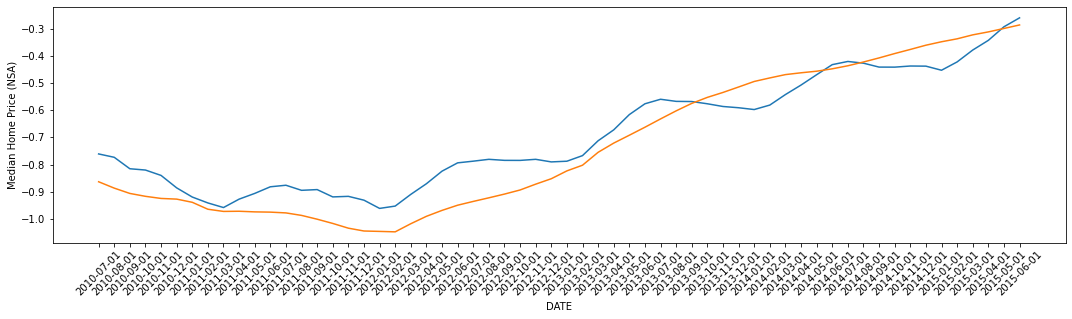

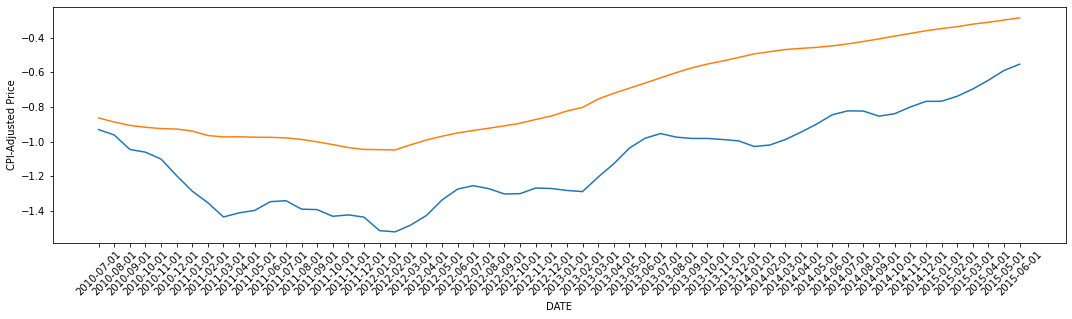

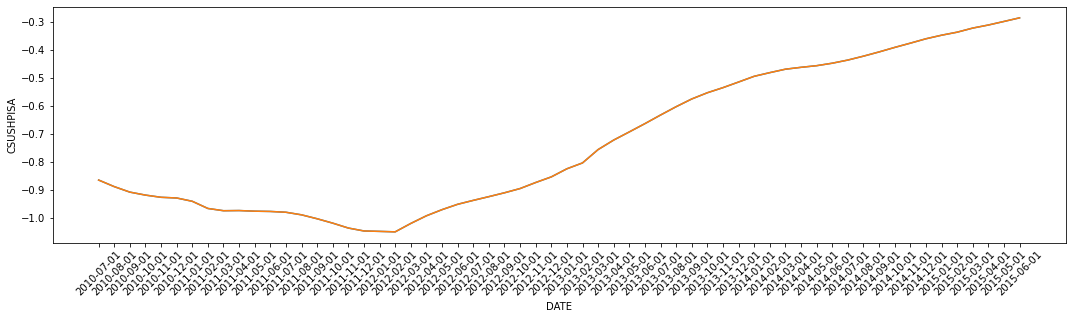

In [14]:
for i in range(1, 18):
    fig = plt.figure(figsize=(15,4))
    sns.lineplot(x=std.iloc[90:150, 0],y=std.iloc[:,i])
    sns.lineplot(x=std.iloc[90:150, 0],y=std.iloc[:,-1])
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.show()

## Model development

In [15]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2 , random_state=24)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [20]:
len(x_train),len(x_test)

(198, 50)

In [21]:
len(y_train),len(y_test)

(198, 50)

### Lasso Regression

In [23]:
from sklearn import linear_model
reg_l = linear_model.Lasso(alpha=0.5)
reg_l.fit(x_train, y_train)

Lasso(alpha=0.5)

In [24]:
y_pred=reg_l.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.997171408539839

### RIDGE Regression

In [26]:
reg_r = linear_model.Ridge(alpha=0.5)
reg_r.fit(x_train, y_train)

Ridge(alpha=0.5)

In [27]:
y_pred = reg_r.predict(x_test)

In [28]:
print(r2_score(y_test, y_pred))

0.9982844241426777
